In [ ]:
!pip install moralis gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Importing The Dependencies**

In [ ]:
from moralis import evm_api
import pandas as pd
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import time
import datetime

###**Requesting data from Moralis API**

In [ ]:
api_key = "--Please Enter Your API Key From The Moralis API--"

In [ ]:
result = evm_api.nft.get_nft_contract_transfers(api_key=api_key,params={    "address": "0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB", "chain": "eth"} )

In [ ]:
df = pd.json_normalize(result['result'])

###**Data Preprocessing**

In [ ]:
df.head()

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator
0,16210162,2022-12-18T07:44:47.000Z,0x7983c618f6bc94a7b700ca7e84a7c97f4286e8e3377b...,0x2097c5220b4d3252c43bc28b65e843198df985d7c7b7...,116,215,73000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,5335,0x90a2da785f866affa9826895e37b721820b33073,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,1,None
1,16208287,2022-12-18T01:26:47.000Z,0xc5f1bc4300eb1b6b9d39917eed3c7277b82c6ce9bce5...,0x7f78d3c807e73f8684b818af155dda52cd1a582c141b...,73,227,67950000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8458,0xf6e5d3fdaee3d38ba42b9b0b8c00eb1255ad6038,0xb30b44dba76a6290e5bd8a29dabd6b9b28355fcf,1,1,None
2,16207816,2022-12-17T23:51:47.000Z,0x02acaba8e50d92ce8d64a8caa942d73edb0a48653d18...,0xc793fc35619ca9d969e03655e6c45c31429ae5d52aa0...,63,143,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7386,0xb7ef760f30d139097ba547bd6f0dfaecbf148452,0xcbbf0cef62fdafe2943726c08acff01680e4a49c,1,1,None
3,16205441,2022-12-17T15:54:11.000Z,0x2d11c0210b08c21562f5ebb52e2550434bfaf847f46a...,0x1fcb134f0ef98910f652e5f2cca3946be119eae0957e...,80,218,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8175,0x6bb662ce293b3d0f20826f2059eb3df0c37a3450,0xe0fa4a19c108eecb019d131cf952c028c4e7a014,1,1,None
4,16205427,2022-12-17T15:51:23.000Z,0x0a8d7d0252240600e58f6d7327957d330ef24462a6ae...,0xf1b50fdc8db4b10b0e902cc09bfcc8c36450342c1aff...,93,207,82500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8175,0xb7ef760f30d139097ba547bd6f0dfaecbf148452,0x6bb662ce293b3d0f20826f2059eb3df0c37a3450,1,1,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   block_number       100 non-null    object
 1   block_timestamp    100 non-null    object
 2   block_hash         100 non-null    object
 3   transaction_hash   100 non-null    object
 4   transaction_index  100 non-null    int64 
 5   log_index          100 non-null    int64 
 6   value              100 non-null    object
 7   contract_type      0 non-null      object
 8   transaction_type   100 non-null    object
 9   token_address      100 non-null    object
 10  token_id           100 non-null    object
 11  from_address       100 non-null    object
 12  to_address         100 non-null    object
 13  amount             100 non-null    object
 14  verified           100 non-null    int64 
 15  operator           0 non-null      object
dtypes: int64(3), object(13)
memory usage: 12.6+ K

In [ ]:
df['value'] = df['value'].astype("float64")

In [ ]:
df = df[df['value']!=0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 95
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   block_number       35 non-null     object 
 1   block_timestamp    35 non-null     object 
 2   block_hash         35 non-null     object 
 3   transaction_hash   35 non-null     object 
 4   transaction_index  35 non-null     int64  
 5   log_index          35 non-null     int64  
 6   value              35 non-null     float64
 7   contract_type      0 non-null      object 
 8   transaction_type   35 non-null     object 
 9   token_address      35 non-null     object 
 10  token_id           35 non-null     object 
 11  from_address       35 non-null     object 
 12  to_address         35 non-null     object 
 13  amount             35 non-null     object 
 14  verified           35 non-null     int64  
 15  operator           0 non-null      object 
dtypes: float64(1), int64(3), obj

In [ ]:
df.head()

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator
0,16210162,2022-12-18T07:44:47.000Z,0x7983c618f6bc94a7b700ca7e84a7c97f4286e8e3377b...,0x2097c5220b4d3252c43bc28b65e843198df985d7c7b7...,116,215,7.300000e+19,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,5335,0x90a2da785f866affa9826895e37b721820b33073,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,1,1,None
1,16208287,2022-12-18T01:26:47.000Z,0xc5f1bc4300eb1b6b9d39917eed3c7277b82c6ce9bce5...,0x7f78d3c807e73f8684b818af155dda52cd1a582c141b...,73,227,6.795000e+19,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8458,0xf6e5d3fdaee3d38ba42b9b0b8c00eb1255ad6038,0xb30b44dba76a6290e5bd8a29dabd6b9b28355fcf,1,1,None
4,16205427,2022-12-17T15:51:23.000Z,0x0a8d7d0252240600e58f6d7327957d330ef24462a6ae...,0xf1b50fdc8db4b10b0e902cc09bfcc8c36450342c1aff...,93,207,8.250000e+19,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8175,0xb7ef760f30d139097ba547bd6f0dfaecbf148452,0x6bb662ce293b3d0f20826f2059eb3df0c37a3450,1,1,None
5,16205350,2022-12-17T15:35:59.000Z,0xeb8b131e1f55471c11f9a1ebc77a768b630ea08c7fee...,0xfc11cf3fe63cb6b7bf70503f04eb784f03904d75dbfa...,123,186,6.595000e+19,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8602,0x0232d1083e970f0c78f56202b9a666b526fa379f,0x779fa4e198b4fd876d28df3d6f4ac0c6be9cf7f5,1,1,None
8,16200112,2022-12-16T22:03:11.000Z,0xf3d23bfadf059a232bfce97e66604135299d21548178...,0xda6530e6afbb88aac5d5edd5e9d07cd184de1965bc3c...,111,212,8.000000e+19,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,5260,0x2707b8785885be4bf54f5eeb38cfbf0fc70ae039,0xb3b5544460759611408aed77e5edfd9e2db4dfab,1,1,None


In [ ]:
date = "2022-12-16T03:25:59.000Z"
date = date[:10]
print(((datetime.datetime.fromisoformat(date)).strftime("%d")),(datetime.datetime.fromisoformat(date)).strftime("%B"),((datetime.datetime.fromisoformat(date)).strftime("%Y")))

16 December 2022


In [ ]:
def datename(x):
    x = x[:10]
    return str((datetime.datetime.fromisoformat(x)).strftime("%d"))+" "+(datetime.datetime.fromisoformat(x)).strftime("%B")+" "+((datetime.datetime.fromisoformat(x)).strftime("%Y"))

In [ ]:
datename("2022-12-16T03:25:59.000Z")

'16 December 2022'

In [ ]:
df['date'] = df['block_timestamp'].apply(datename)

In [ ]:
df['date']

0     18 December 2022
1     18 December 2022
4     17 December 2022
5     17 December 2022
8     16 December 2022
15    15 December 2022
18    15 December 2022
21    15 December 2022
28    14 December 2022
30    14 December 2022
32    14 December 2022
33    14 December 2022
35    14 December 2022
36    13 December 2022
42    13 December 2022
43    13 December 2022
44    13 December 2022
48    13 December 2022
51    13 December 2022
52    13 December 2022
53    13 December 2022
54    13 December 2022
59    13 December 2022
62    12 December 2022
63    12 December 2022
64    12 December 2022
74    12 December 2022
76    12 December 2022
77    11 December 2022
83    11 December 2022
86    11 December 2022
90    10 December 2022
92    10 December 2022
94    10 December 2022
95    10 December 2022
Name: date, dtype: object

In [ ]:
df.drop(columns=['block_number','block_timestamp','block_hash','transaction_hash','transaction_index','log_index','contract_type','transaction_type','token_address','token_id','from_address','to_address','amount','verified','operator'],axis=1,inplace=True)

In [ ]:
df['value'] /= 10000000000000000

In [ ]:
df.head()

,value,date
0,7300.0,18 December 2022
1,6795.0,18 December 2022
4,8250.0,17 December 2022
5,6595.0,17 December 2022
8,8000.0,16 December 2022


###**Plotting the Data**

Text(0.5, 0, 'Dates')

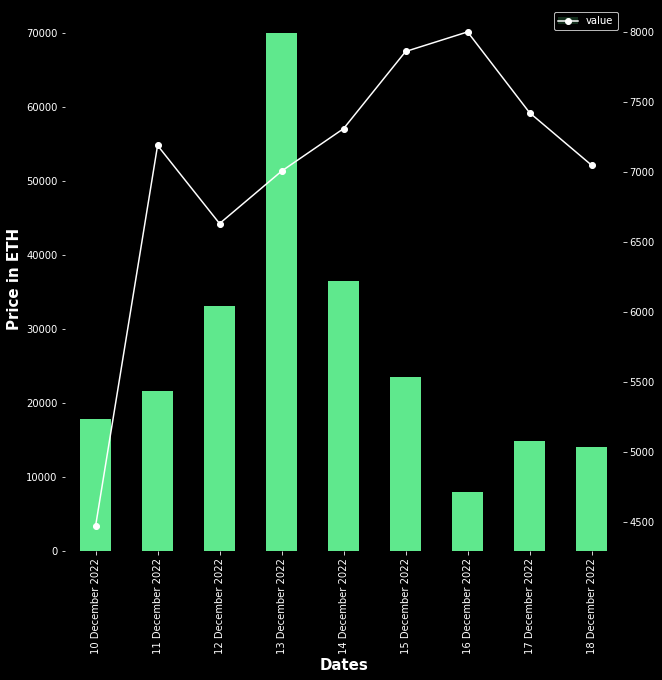

In [ ]:
fig0,ax0 = plt.subplots()

ax1 = ax0.twinx()

plt.style.use('dark_background')

ax0 = df.groupby(["date"]).sum().plot(kind='bar',figsize=(10,10),color='#5FE88D', ax=ax0)

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel("Price in ETH",size=15 ,fontweight= 'bold')

ax1 = df.groupby(["date"]).mean().plot(kind='line',figsize=(10,10),color='white',style ='o-',ax=ax1)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax0.set_xlabel("Dates",size=15 ,fontweight= 'bold')
#plt.show()

###**Building an interface using Gradio**

In [37]:
def plot_pens(Contract_Address):

    cursor = ''
    df = pd.DataFrame

    for i in range(5):
        result = evm_api.nft.get_nft_contract_transfers(api_key=api_key,params={    "address": Contract_Address,     "chain": "eth" , "cursor": cursor} )
        
        cursor = result['cursor']
        df_cursor = pd.json_normalize(result['result'])

        if df.empty:
            df = df_cursor
        else:
            df= pd.concat([df,df_cursor])
    
        time.sleep(1.1)

    df['value'] = df['value'].astype("float64")
    df = df[df['value']!=0]

    df['date'] = df['block_timestamp'].apply(datename)

    df.drop(columns=['block_number','block_timestamp','block_hash','transaction_hash','transaction_index','log_index','contract_type','transaction_type','token_address','token_id','from_address','to_address','amount','verified','operator'],axis=1,inplace=True)    
    
    df['value'] /= 10000000000000000

    fig0,ax0 = plt.subplots()
    ax1 = ax0.twinx()

    plt.style.use('dark_background')

    ax0 = df.groupby(["date"]).sum().plot(kind='bar',figsize=(15,15), color= '#5FE88D', ax=ax0)

    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['left'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.set_ylabel("Price in ETH",size=15 ,fontweight= 'bold')

    ax1 = df.groupby(["date"]).mean().plot(kind='line',figsize=(15,15),color='white',style ='o-',ax=ax1)

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax0.set_xlabel("Dates",size=15 ,fontweight= 'bold')
    return fig0


iface = gr.Interface(
    fn=plot_pens, 
    layout='vertical',
    inputs= 'text',
    outputs=['plot'],
    title="CryptoKnight",
    description="Please Enter the Contract Address of the NFT which you want to analyze",
    theme='peach'
).launch()

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `layout` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/interface.py:332: UserWarning: Currently, only the 'default' theme is supported.
  warnings.warn("Currently, only the 'default' theme is supported.")


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>